
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**


---


Integrantes:
*   Candelaria Arpajou: mcarpajou@santafe-conicet.gov.ar
*   Hugo Folonier: hugofolonier@gmail.com
*   Gustavo Jaca: gustavojaca@gmail.com

**Edición 2022**

---
# Apendizaje Supervisado

#**Trabajo práctico entregable**

Esta competencia ha sido creada a partir de la competencia [Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/overview). 

Los datos fueron tomados originalmente de la competencia y se generaron los datasets de entrenamiento y evaluación.

**Requerimientos del práctico**

1.   Realizar un análisis exploratorio de datos, y utilizar lo aprendido para generar su mejor modelo.
2.   Superar el puntaje del baseline (público) en la competencia kaggle.
3.   Usar al menos 3 modelos distintos al del árbol de decisión que se explora como baseline (se puede explorar más profundamente el árbol de decisión, pero aún así deberán explorar otros modelos).
4.   Entregar un notebook con el análisis exploratorio de datos y el código con los 3 mejores modelos entregados en la competencia (de acuerdo a los resultados obtenidos).

**Pasos a seguir**

1.   Crear una cuenta en kaggle.com.
2.   Sumarse a la competencia [acá](https://www.kaggle.com/t/d7dfd142ac1042168d052624b3dee531)
3.   Hacer click en "Join Competition".
4.   Aceptar las reglas.
5.   Crear un equipo (Team): El trabajo se evaluará en los grupos asignados.
Pueden descargar los datos (Data), aunque también están incluidos en este repo.
6.   Una vez realizada una predicción (ver ejemplo abajo), subir los resultados a kaggle haciendo click en "Submit Predictions" en la página principal de la competencia. Ahí deberán subir el archivo csv generado y describir (para sus registros) qué están subiendo.

**Un ejemplo**

Adjuntamos una implementación que tiene por objetivo:

*   Levantar los datos que usaremos.
*   Analizar de una manera simple los datos.
*   Preparar los datos para procesarlos con un modelo en particular.
*   Crear un baseline para la competencia.
*   Generar el archivo que se subirá a kaggle para su evaluación.

**Subir una predicción a Kaggle**

En el ejemplo de baseline que se entrega, se genera un archivo en el path data/submission.csv. Tal archivo es un csv con un formato en particular, que asigna a números de visita en el conjunto de test, una predicción de si fue teletransportado o no a otra dimensión alternativa. Ese archivo debe ser subido a kaggle como lo explicamos arriba: haciendo click en "Submit Predictions" en la página principal de la competencia.

**Algunas consideraciones**

*   En el baseline solo se utiliza cross-validation (mediante GridSearchCV) para evaluar el modelo, son libres de generar un subconjunto de validación aparte del conjunto de entrenamiento si así lo desean.
*   Los features escogidos no tienen ningún análisis y son casi por defecto. Parte del proceso de encontrar un buen modelo es ver como trabajar dichos features.
*   La métrica a optimizar será el accuracy score.

# **Desarrollo**

## **Librerias y módulos**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from missingno import matrix

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer # Hay que habilitar el Imputador antes de importarlo porque es experimental
from sklearn.impute import IterativeImputer

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,f1_score,roc_auc_score,roc_curve

from sklearn.model_selection import GridSearchCV,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

##**Análisis Exploratorio**

### Tablero

In [ ]:
dataset = 'diplodatos' # ['diplodatos'|'kaggle']
modo = 'full' # ['sample'|'full']

### Carga del DF

In [ ]:
if dataset == 'kaggle':
  url = 'https://drive.google.com/file/d/1pa8STh4y3MYqJw1JvzS_VpCJwSFLZ4JQ/view?usp=sharing' # Dataset de la competencia de Kaggle
  path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2] 
if dataset == 'diplodatos':
  path = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/train.csv' # Este es del practico de la materia

df = pd.read_csv(path)
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,F/1319/S,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1
7819,2693,Earth,False,G/459/S,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0
7820,8076,Mars,True,F/1772/P,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1
7821,3829,Earth,False,E/253/P,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0


In [ ]:
# Si estamos corriendo con una porcion menor de los datos, usamos el método train_test_split para tomar el 20%
# de los datos y correr todo más rápido

if modo == 'sample':
  df_train, df_test = train_test_split(df, test_size=0.2) #stratify=df[['HomePlanet','CrioSleep','Cabin_Deck','Cabin_Num','Cabin_Side','Destination','Transported']]
  df = df_test.copy()


### Descripción General

In [ ]:
# Tipo de Variables
df.dtypes

PassengerId       int64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [ ]:
df.isna().sum()

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

Como puede observarse, hay una considerable cantidad de datos faltantes que habría que imputar antes de aplicar los modelos de regresión:

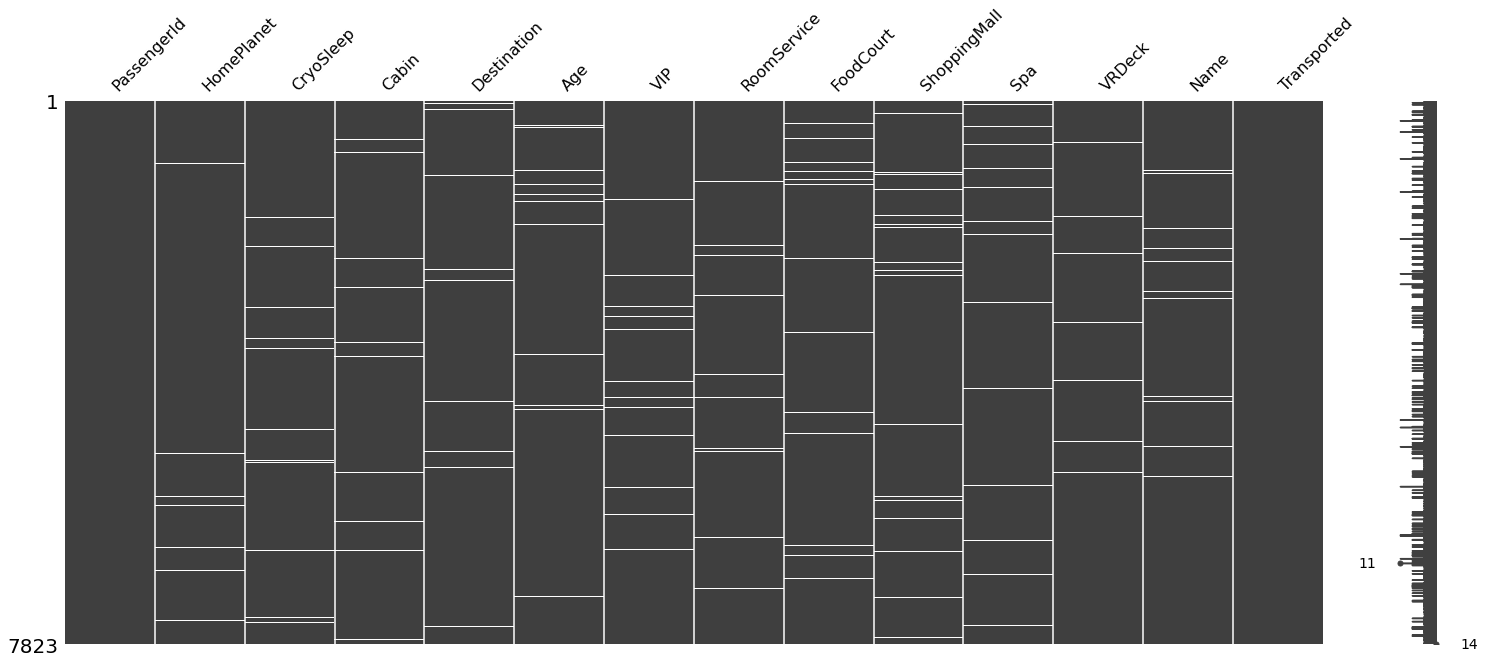

In [ ]:
matrix(df)

Por lo que puede observarse gráficamente, la pérdida parece ser aleatoria, con lo que aplicaremos diferentes métodos de imputación, con el fin de perder la menor cantidad posible de información.

In [ ]:
num_df = df.select_dtypes(include=[np.number])
cat_df = df.select_dtypes(exclude=[np.number])

print(f'Cantidad de Variables Numéricas: {num_df.shape[1]}')
print(f'Cantidad de Variables Categóricas: {cat_df.shape[1]}')

Cantidad de Variables Numéricas: 8
Cantidad de Variables Categóricas: 6


## Tratamiento de Variables

In [ ]:
# Splitteamos la variable Cabin para poder trabajar con sus tres componentes separadamente
df[['Cabin_Deck','Cabin_Num','Cabin_Side']] = df.Cabin.str.split('/', expand=True)

# Se elimina la variable original
df.drop('Cabin', axis=1, inplace=True) 
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_Deck,Cabin_Num,Cabin_Side
0,3430,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0,C,123,P
1,669,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1,F,126,S
2,8430,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1,B,343,S
3,6463,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0,F,1420,P
4,85,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0,G,9,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,Risps Hacle,1,F,1319,S
7819,2693,Earth,False,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,Gabrie Reenez,0,G,459,S
7820,8076,Mars,True,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,Panzel Ruity,1,F,1772,P
7821,3829,Earth,False,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,Belly Weavesend,0,E,253,P


In [ ]:
# Splitteamos también el nombre del apellido
df[['First_Name','Last_Name']] = df.Name.str.split(expand=True)

# Se elimina la variable original y el nombre de pila (First_Name)
df.drop(['Name','First_Name'], axis=1, inplace=True)
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,Last_Name
0,3430,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0,C,123,P,Tronsive
1,669,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1,F,126,S,Sha
2,8430,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,B,343,S,Tinganking
3,6463,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0,F,1420,P,Grifford
4,85,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0,G,9,P,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,6528,Mars,False,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1,F,1319,S,Hacle
7819,2693,Earth,False,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,0,G,459,S,Reenez
7820,8076,Mars,True,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,1,F,1772,P,Ruity
7821,3829,Earth,False,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,0,E,253,P,Weavesend


In [ ]:
if dataset == 'kaggle':
  # Splitteamos finalmente el PassengerId en Grupo y Number
  df[['PassengerId_Group','PassengerId_Number']] = df.PassengerId.str.split('_', expand=True)

# Se elimina la variable original
df.drop('PassengerId', axis=1, inplace=True)
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_Deck,Cabin_Num,Cabin_Side,Last_Name
0,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0,C,123,P,Tronsive
1,Mars,True,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,1,F,126,S,Sha
2,Europa,True,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,1,B,343,S,Tinganking
3,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0,F,1420,P,Grifford
4,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0,G,9,P,Dunnisey
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,Mars,False,TRAPPIST-1e,12.0,NaN,0.0,0.0,0.0,0.0,0.0,1,F,1319,S,Hacle
7819,Earth,False,TRAPPIST-1e,44.0,False,0.0,0.0,744.0,62.0,3.0,0,G,459,S,Reenez
7820,Mars,True,TRAPPIST-1e,55.0,False,0.0,0.0,0.0,0.0,0.0,1,F,1772,P,Ruity
7821,Earth,False,TRAPPIST-1e,15.0,False,0.0,840.0,123.0,0.0,20.0,0,E,253,P,Weavesend


In [ ]:
# Antes de hacer encoding, verificamos la cantidad de valores que toma cada variable categórica:

Cant_apellidos = len(df.Last_Name.unique())
Cant_decks = len(df.Cabin_Deck.unique())
Cant_camarotes = len(df.Cabin_Num.unique())

print(f'La Cantidad de Apellidos es: {Cant_apellidos}')
print(f'La Cantidad de Decks es: {Cant_decks}')
print(f'La Cantidad de Camarotes es: {Cant_camarotes}')

if dataset == 'kaggle':
  Cant_PassengerId_Group = len(df.PassengerId_Group.unique())
  Cant_PassengerId_Number = len(df.PassengerId_Number.unique())
  print(f'La Cantidad de Passenger Groups es: {Cant_PassengerId_Group}')
  print(f'La Cantidad de Passenger Number es: {Cant_PassengerId_Number}')

La Cantidad de Apellidos es: 2182
La Cantidad de Decks es: 9
La Cantidad de Camarotes es: 1773


## Preparación para el Entrenamiento

In [ ]:
# Creación del DF X_train y separación de la clase Target
X_train = df.copy()
X_train.drop('Transported', axis= 1, inplace=True)
y_train = df.Transported

# Guardamos un DF X_train sin imputar
X_train_with_NaN = X_train.copy()

In [ ]:
print(f'El conjunto de entrenamiento tiene dimensiones: {X_train.shape} ')
print(f'Los labels de entrenamiento tiene dimensiones: {y_train.shape} ')

El conjunto de entrenamiento tiene dimensiones: (7823, 14) 
Los labels de entrenamiento tiene dimensiones: (7823,) 


###Pipelines para Datos Numéricos

In [ ]:
# Pipeline con Imputación
num_pipeline = Pipeline([
('scaler', StandardScaler()),
('imputer', SimpleImputer(strategy="median")),
])

# Pipeline sin Imputar
num_pipeline_with_NaN = Pipeline([
('scaler', StandardScaler()),
])

### Pipelines para Datos Categóricos


In [ ]:
# Pipeline con Imputación
cat_pipeline = Pipeline([

#('encoder', OneHotEncoder(sparse=False)),
#('scaler', StandardScaler()),
#('imputer', IterativeImputer(random_state=0)),

('encoder', OneHotEncoder(sparse=False)),
('scaler', StandardScaler()),
('imputer', KNNImputer()),
])

# Pipeline sin Imputar
cat_pipeline_with_NaN = Pipeline([
('encoder', OneHotEncoder(sparse=False)),
('scaler', StandardScaler()),
])

### Pipeline ColumnTransformer

In [ ]:
# Antes de aplicar la transformación de los datos, listamos las columnas numéricas y las categóricas 
num_df = X_train.select_dtypes(include=[np.number])
cat_df = X_train.select_dtypes(exclude=[np.number])

num_attribs = list(num_df)
cat_attribs = list(cat_df)

if dataset == 'kaggle':
  cat_attribs.remove('PassengerId_Group') # Posible mejora, parsear el grupo de pasajero y agregarlo como variable categorica
  cat_attribs.remove('PassengerId_Number') # Posible mejora, parsear el grupo de pasajero y agregarlo como variable categorica

cat_attribs.remove('Cabin_Num') # No excluir esto puede ser una mejora
cat_attribs.remove('Last_Name') # No excluir esto puede ser una mejora

In [ ]:
# Pipeline con Imputación
full_pipeline = ColumnTransformer([
("cat", cat_pipeline, cat_attribs),
("num", num_pipeline, num_attribs),
])

# Pipeline sin Imputar
full_pipeline_with_NaN = ColumnTransformer([
("cat", cat_pipeline_with_NaN, cat_attribs),
("num", num_pipeline_with_NaN, num_attribs),
])

### Transformacion

In [ ]:
# Preparamos el X_train con el Pipeline con imputación
X_train = full_pipeline.fit_transform(X_train)

# Preparamos el X_train con el Pipeline sin imputación
X_train_with_NaN = full_pipeline_with_NaN.fit_transform(X_train_with_NaN)

In [ ]:
X_train = pd.DataFrame(X_train)
X_train

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.053183,1.744389,-0.506065,-0.153026,0.778483,-0.737504,-0.160307,-0.512036,-0.318866,0.686728,...,-0.1552,1.028924,-0.981634,-0.1552,1.944636,-0.332891,2.099303,-0.266942,-0.097078,3.272797
1,-1.053183,-0.573267,1.976032,-0.153026,-1.284550,1.355926,-0.160307,-0.512036,-0.318866,-1.456181,...,-0.1552,-0.971889,1.018710,-0.1552,-0.752347,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233
2,-1.053183,1.744389,-0.506065,-0.153026,-1.284550,1.355926,-0.160307,-0.512036,-0.318866,0.686728,...,-0.1552,-0.971889,1.018710,-0.1552,0.284954,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233
3,0.949503,-0.573267,-0.506065,-0.153026,0.778483,-0.737504,-0.160307,-0.512036,-0.318866,0.686728,...,-0.1552,1.028924,-0.981634,-0.1552,0.976488,-0.123802,0.464079,-0.288685,-0.269134,-0.083662
4,0.949503,-0.573267,-0.506065,-0.153026,0.778483,-0.737504,-0.160307,-0.512036,-0.318866,0.686728,...,-0.1552,1.028924,-0.981634,-0.1552,-0.683193,-0.332891,-0.281056,0.831932,-0.268252,-0.239138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,-1.053183,-0.573267,1.976032,-0.153026,0.778483,-0.737504,-0.160307,-0.512036,-0.318866,0.686728,...,-0.1552,-0.971889,1.018710,-0.1552,-1.167267,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233
7819,0.949503,-0.573267,-0.506065,-0.153026,0.778483,-0.737504,-0.160307,-0.512036,-0.318866,0.686728,...,-0.1552,-0.971889,1.018710,-0.1552,1.045642,-0.332891,-0.281056,0.955702,-0.214429,-0.267489
7820,-1.053183,-0.573267,1.976032,-0.153026,-1.284550,1.355926,-0.160307,-0.512036,-0.318866,0.686728,...,-0.1552,1.028924,-0.981634,-0.1552,1.806329,-0.332891,-0.281056,-0.288685,-0.269134,-0.270233
7821,0.949503,-0.573267,-0.506065,-0.153026,0.778483,-0.737504,-0.160307,-0.512036,-0.318866,0.686728,...,-0.1552,1.028924,-0.981634,-0.1552,-0.959807,-0.332891,0.237084,-0.082960,-0.269134,-0.251942


In [ ]:
print(f'El conjunto de entrenamiento tiene dimensiones: {X_train.shape} ')
print(f'Los labels de entrenamiento tiene dimensiones: {y_train.shape} ')

El conjunto de entrenamiento tiene dimensiones: (7823, 32) 
Los labels de entrenamiento tiene dimensiones: (7823,) 


## **Testing Modelos**

In [ ]:
Resultados = {}

In [ ]:
X_tr, X_t, y_tr, y_t = train_test_split(X_train, y_train, test_size=0.2)

model_LSVC = LinearSVC(random_state=0, max_iter=10000, dual=False)
model_DTC = DecisionTreeClassifier(random_state=0)
model_MLP = MLPClassifier(random_state=0, max_iter=1000)
model_GBC = GradientBoostingClassifier(random_state=0)
model_RFC = RandomForestClassifier(random_state=0)
model_SVC = SVC(verbose=True, random_state=0)
model_HGBC = HistGradientBoostingClassifier(random_state=0)

# Modelos sin testear:
#   LogisticRegression(),
#   GaussianNB()

models = [model_LSVC, model_DTC, model_MLP, model_GBC, model_RFC, model_SVC]

for model in models:
  model.fit(X_tr, y_tr)
    
  train_predictions = model.predict(X_tr)
  accuracy = accuracy_score(y_tr, train_predictions)
  print(f'Accuracy train {model}: %.2f%%' % (accuracy * 100.0))

  test_predictions = model.predict(X_t)
  accuracy = accuracy_score(y_t, test_predictions)
  print(f'Accuracy test {model}: %.2f%%\n' % (accuracy * 100.0))

# Agrego Histogram GBC para probar sin imputar Missing Values    
X_tr, X_t, y_tr, y_t = train_test_split(X_train_with_NaN, y_train, test_size=0.2)

model_HGBC.fit(X_train_with_NaN, y_train)

train_predictions = model_HGBC.predict(X_tr)
accuracy = accuracy_score(y_tr, train_predictions)
print(f'Accuracy train {model_HGBC}: %.2f%%' % (accuracy * 100.0))

test_predictions = model_HGBC.predict(X_t)
accuracy = accuracy_score(y_t, test_predictions)
print(f'Accuracy test {model_HGBC}: %.2f%%\n' % (accuracy * 100.0))

Accuracy train LinearSVC(dual=False, max_iter=10000, random_state=0): 79.72%
Accuracy test LinearSVC(dual=False, max_iter=10000, random_state=0): 77.25%

Accuracy train DecisionTreeClassifier(random_state=0): 95.62%
Accuracy test DecisionTreeClassifier(random_state=0): 74.38%

Accuracy train MLPClassifier(max_iter=1000, random_state=0): 85.60%
Accuracy test MLPClassifier(max_iter=1000, random_state=0): 77.44%

Accuracy train GradientBoostingClassifier(random_state=0): 82.12%
Accuracy test GradientBoostingClassifier(random_state=0): 78.59%

Accuracy train RandomForestClassifier(random_state=0): 95.62%
Accuracy test RandomForestClassifier(random_state=0): 77.12%

[LibSVM]Accuracy train SVC(random_state=0, verbose=True): 81.83%
Accuracy test SVC(random_state=0, verbose=True): 77.64%

Accuracy train HistGradientBoostingClassifier(random_state=0): 86.48%
Accuracy test HistGradientBoostingClassifier(random_state=0): 86.45%



####Linear SVC - Linear Support Vector Classifier

In [ ]:
penalty = ['l1', 'l2']
loss = ['hinge', 'squared_hinge']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

hiperparametros = {'penalty': penalty,
                   'loss': loss,
                   'C': C}
                   
print(f'El GridSearchCV evalúa {len(penalty)*len(loss)*len(C)} alternativas diferentes')

El GridSearchCV evalúa 28 alternativas diferentes


In [ ]:
LSVC_Grid = GridSearchCV(model_LSVC, hiperparametros, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
LSVC_Grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_classes.py", line 272, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/usr/loc

GridSearchCV(cv=5,
             estimator=LinearSVC(dual=False, max_iter=10000, random_state=0),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
print('Los mejores hiperparámetros son:')
LSVC_Grid.best_params_

Los mejores hiperparámetros son:


{'C': 0.01, 'loss': 'squared_hinge', 'penalty': 'l2'}

In [ ]:
max_accuracy = np.nanmax(LSVC_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
mean_fit_time = LSVC_Grid.cv_results_['mean_fit_time']

El accuracy del mejor modelo es 0.791


In [ ]:
Resultados["Linear SVC"] = {
    'model': model_LSVC,
    'accuracy': max_accuracy,
    'best_params': LSVC_Grid.best_params_,
    'total_fit_time': sum(LSVC_Grid.cv_results_['mean_fit_time'])
    }

#### SVM - Support Vector Machine

In [ ]:
C = [0.1, 1, 10]
kernel = ['poly', 'rbf', 'sigmoid']
degree = [2, 3, 4, 5, 6]

hiperparametros = {
    'C': C,
    'kernel': kernel,
    'degree': degree
    }
                   
print(f'El GridSearchCV evalúa {len(C)*len(kernel)*len(degree)} alternativas diferentes')

El GridSearchCV evalúa 45 alternativas diferentes


In [ ]:
SVC_Grid = GridSearchCV(model_SVC, hiperparametros, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
SVC_Grid.fit(X_train,y_train)

[LibSVM]

GridSearchCV(cv=5, estimator=SVC(random_state=0, verbose=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4, 5, 6],
                         'kernel': ['poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [ ]:
print('Los mejores hiperparámetros son:')
SVC_Grid.best_params_

Los mejores hiperparámetros son:


{'C': 10, 'degree': 2, 'kernel': 'rbf'}

In [ ]:
max_accuracy = np.nanmax(SVC_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
mean_fit_time = SVC_Grid.cv_results_['mean_fit_time']

El accuracy del mejor modelo es 0.7953


In [ ]:
Resultados["SVC"] = {
    'model': model_SVC,
    'accuracy': max_accuracy,
    'best_params': SVC_Grid.best_params_,
    'total_fit_time': sum(SVC_Grid.cv_results_['mean_fit_time'])
    }

#### DTC - Decision Tree Classifier

In [ ]:
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_depth = [6,8,9,10,12,15] 
#min_samples_split = 
#min_samples_leaf = 

hiperparametros = {
    'criterion': criterion,
    'splitter': splitter,
    'max_depth': max_depth
    }
                   
print(f'El GridSearchCV evalúa {len(criterion)*len(splitter)*len(max_depth)} alternativas diferentes')

El GridSearchCV evalúa 36 alternativas diferentes


In [ ]:
DTC_Grid = GridSearchCV(model_DTC, hiperparametros, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
DTC_Grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [6, 8, 9, 10, 12, 15],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print('Los mejores hiperparámetros son:')
DTC_Grid.best_params_

Los mejores hiperparámetros son:


{'criterion': 'entropy', 'max_depth': 9, 'splitter': 'best'}

In [ ]:
max_accuracy = np.nanmax(DTC_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
mean_fit_time = DTC_Grid.cv_results_['mean_fit_time']

El accuracy del mejor modelo es 0.7771


In [ ]:
Resultados["DTC"] = {
    'model': model_DTC,
    'accuracy': max_accuracy,
    'best_params': DTC_Grid.best_params_,
    'total_fit_time': sum(DTC_Grid.cv_results_['mean_fit_time'])
    }

####MLP - Multi-layer Perceptron classifier

In [ ]:
solver = ['sgd','adam']
alpha = [0.001, 0.01, 0.1]
hidden_layer_sizes = [(10,),(32,),(48,),(64,),(72,)]
activation = ['logistic','tanh','relu']

hiperparametros = {
    #'solver': solver,
    #'alpha': alpha,
    'hidden_layer_sizes': hidden_layer_sizes,
    'activation': activation
    }
                   
print(f'El GridSearchCV evalúa {len(solver)*len(alpha)*len(hidden_layer_sizes)*len(activation)} alternativas diferentes')

El GridSearchCV evalúa 90 alternativas diferentes


In [ ]:
MLP_Grid = GridSearchCV(model_MLP, hiperparametros, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
MLP_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=0),
             n_jobs=-1,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10,), (32,), (48,), (64,),
                                                (72,)]},
             scoring='accuracy')

In [ ]:
print('Los mejores hiperparámetros son:')
MLP_Grid.best_params_

Los mejores hiperparámetros son:


{'activation': 'relu', 'hidden_layer_sizes': (32,)}

In [ ]:
max_accuracy = np.nanmax(MLP_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
mean_fit_time = MLP_Grid.cv_results_['mean_fit_time']

El accuracy del mejor modelo es 0.8005


In [ ]:
Resultados["MLP"] = {
    'model': model_MLP,
    'accuracy': max_accuracy,
    'best_params': MLP_Grid.best_params_,
    'total_fit_time': sum(MLP_Grid.cv_results_['mean_fit_time'])
    }

#### GBC - Gradient Boosting Classifier

In [ ]:
loss = ['log_loss', 'exponential']
learning_rate = [0.1, 0.110, 0.115]
n_estimators = [86,87,88,89]
criterion = ['friedman_mse', 'squared_error', 'mse']
max_depth = [3,4,5] 

hiperparametros = {
    'loss': loss,
    'learning_rate': learning_rate,
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_depth': max_depth
    }
                   
print(f'El GridSearchCV evalúa {len(loss)*len(learning_rate)*len(n_estimators)*len(criterion)*len(max_depth)} alternativas diferentes')

El GridSearchCV evalúa 216 alternativas diferentes


In [ ]:
GBC_Grid = GridSearchCV(model_GBC, hiperparametros, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
GBC_Grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 282, in _check_params
    raise ValueError("Loss '{0:s}' not supported. ".format(self.loss))
ValueError: Loss 'log_loss' 

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.11, 0.115],
                         'loss': ['log_loss', 'exponential'],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [86, 87, 88, 89]},
             scoring='accuracy')

In [ ]:
print('Los mejores hiperparámetros son:')
GBC_Grid.best_params_

Los mejores hiperparámetros son:


{'criterion': 'squared_error',
 'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 5,
 'n_estimators': 88}

In [ ]:
max_accuracy = np.nanmax(GBC_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
mean_fit_time = GBC_Grid.cv_results_['mean_fit_time']

El accuracy del mejor modelo es 0.8037


In [ ]:
Resultados["GBC"] = {
    'model': model_GBC,
    'accuracy': max_accuracy,
    'best_params': GBC_Grid.best_params_,
    'total_fit_time': sum(GBC_Grid.cv_results_['mean_fit_time'])
}

####RFC - Random Forest Classifier

In [ ]:
n_estimators = [200, 700]
criterion = ['gini', 'entropy', 'log_loss']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [5,6,7,8,9]

hiperparametros = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth
    }
                   
print(f'El GridSearchCV evalúa {len(n_estimators)*len(criterion)*len(max_features)*len(max_depth)} alternativas diferentes')

El GridSearchCV evalúa 90 alternativas diferentes


In [ ]:
RFC_Grid = GridSearchCV(model_RFC, hiperparametros, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
RFC_Grid.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 700]},
             scoring='accuracy')

In [ ]:
print('Los mejores hiperparámetros son:')
RFC_Grid.best_params_

Los mejores hiperparámetros son:


{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 700}

In [ ]:
max_accuracy = np.nanmax(RFC_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
mean_fit_time = RFC_Grid.cv_results_['mean_fit_time']

El accuracy del mejor modelo es 0.798


In [ ]:
Resultados["RFC"] = {
    'model': model_RFC,
    'accuracy': max_accuracy,
    'best_params': RFC_Grid.best_params_,
    'total_fit_time': sum(RFC_Grid.cv_results_['mean_fit_time'])
    }

####HGBC - Histogram-based Gradient Boosting Classification Tree

In [ ]:
learning_rate = [0.01, 0.1, 1, 10]
max_leaf_nodes = [3,5,10,12,15]

hiperparametros = {
    'learning_rate': learning_rate,
    'max_leaf_nodes': max_leaf_nodes
    }
                   
print(f'El GridSearchCV evalúa {len(learning_rate)*len(max_leaf_nodes)} alternativas diferentes')

El GridSearchCV evalúa 20 alternativas diferentes


In [ ]:
HGBC_Grid = GridSearchCV(model_HGBC, hiperparametros, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
HGBC_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_leaf_nodes': [3, 5, 10, 12, 15]},
             scoring='accuracy')

In [ ]:
print('Los mejores hiperparámetros son:')
HGBC_Grid.best_params_

Los mejores hiperparámetros son:


{'learning_rate': 0.1, 'max_leaf_nodes': 10}

In [ ]:
max_accuracy = np.nanmax(HGBC_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
mean_fit_time = HGBC_Grid.cv_results_['mean_fit_time']

El accuracy del mejor modelo es 0.8072


In [ ]:
Resultados["HGBC"] = {
    'model': model_HGBC,
    'accuracy': max_accuracy,
    'best_params': HGBC_Grid.best_params_,
    'total_fit_time': sum(HGBC_Grid.cv_results_['mean_fit_time'])
    }

####HGBC sin Imputar Missing Values

In [ ]:
learning_rate = [0.01, 0.1, 1, 10]
max_leaf_nodes = [3,5,10,12,15]

hiperparametros = {
    'learning_rate': learning_rate,
    'max_leaf_nodes': max_leaf_nodes
    }
                   
print(f'El GridSearchCV evalúa {len(learning_rate)*len(max_leaf_nodes)} alternativas diferentes')

El GridSearchCV evalúa 20 alternativas diferentes


In [ ]:
HGBC_with_NaN_Grid = GridSearchCV(model_HGBC, hiperparametros, refit=True, cv=5, scoring='accuracy', n_jobs=-1)
HGBC_with_NaN_Grid.fit(X_train_with_NaN,y_train)

GridSearchCV(cv=5, estimator=HistGradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1, 10],
                         'max_leaf_nodes': [3, 5, 10, 12, 15]},
             scoring='accuracy')

In [ ]:
print('Los mejores hiperparámetros son:')
HGBC_with_NaN_Grid.best_params_

Los mejores hiperparámetros son:


{'learning_rate': 0.1, 'max_leaf_nodes': 10}

In [ ]:
max_accuracy = np.nanmax(HGBC_with_NaN_Grid.cv_results_['mean_test_score'])
print(f'El accuracy del mejor modelo es {max_accuracy:.04}')
mean_fit_time = HGBC_with_NaN_Grid.cv_results_['mean_fit_time']

El accuracy del mejor modelo es 0.8081


In [ ]:
Resultados["HGBC with NaN"] = {
    'model': model_HGBC,
    'accuracy': max_accuracy,
    'best_params': HGBC_with_NaN_Grid.best_params_,
    'total_fit_time': sum(HGBC_with_NaN_Grid.cv_results_['mean_fit_time'])
    }

## **Resultados**

In [ ]:
resultados_df = pd.DataFrame(Resultados).T
resultados_df = resultados_df.sort_values(by=['accuracy'],ascending=False)
resultados_df

,model,accuracy,best_params,total_fit_time
HGBC with NaN,HistGradientBoostingClassifier(random_state=0),0.808133,"{'learning_rate': 0.1, 'max_leaf_nodes': 10}",7.11224
HGBC,HistGradientBoostingClassifier(random_state=0),0.807238,"{'learning_rate': 0.1, 'max_leaf_nodes': 10}",6.716133
GBC,([DecisionTreeRegressor(criterion='friedman_ms...,0.803659,"{'criterion': 'squared_error', 'learning_rate'...",175.748346
MLP,"MLPClassifier(max_iter=1000, random_state=0)",0.800462,"{'activation': 'relu', 'hidden_layer_sizes': (...",385.879309
RFC,"(DecisionTreeClassifier(max_features='auto', r...",0.798034,"{'criterion': 'gini', 'max_depth': 9, 'max_fea...",195.687997
SVC,"SVC(random_state=0, verbose=True)",0.795348,"{'C': 10, 'degree': 2, 'kernel': 'rbf'}",150.469546
Linear SVC,"LinearSVC(dual=False, max_iter=10000, random_s...",0.791003,"{'C': 0.01, 'loss': 'squared_hinge', 'penalty'...",3.769319
DTC,DecisionTreeClassifier(random_state=0),0.777069,"{'criterion': 'entropy', 'max_depth': 9, 'spli...",0.919157


In [ ]:
# Imprimimos el mejor modelo:
winner_model = resultados_df[0:1].index.values
winner_model

array(['HGBC with NaN'], dtype=object)

## **Testing**



####**Preparación del Conjunto de Testing**

In [ ]:
if dataset == 'kaggle':
  url = 'https://drive.google.com/file/d/1Xk-4HX2T-2dtiQsZv_sEeVXxkn1XEA5V/view?usp=sharing'
  path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

if dataset == 'diplodatos':
  path = 'https://raw.githubusercontent.com/DiploDatos/AprendizajeSupervisado/master/Pr%C3%A1ctico/test.csv' ## Este es el set de datos de la materia

df_test = pd.read_csv(path)

In [ ]:
df_test[['Cabin_Deck','Cabin_Num','Cabin_Side']] = df_test.Cabin.str.split('/', expand=True)
df_test.drop('Cabin', axis=1, inplace=True)

In [ ]:
df_test[['First_Name','Last_Name']] = df_test.Name.str.split(expand=True)
df_test.drop('Name', axis=1, inplace=True)

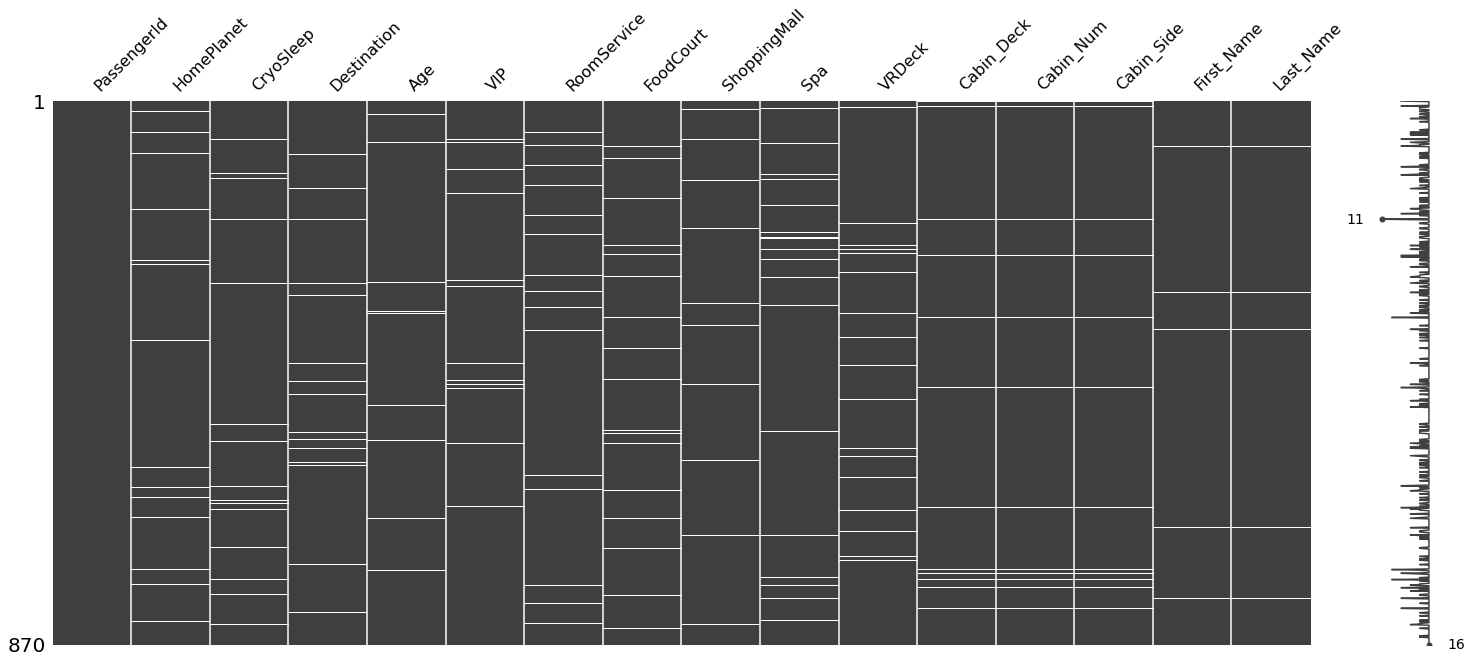

In [ ]:
matrix(df_test)

In [ ]:
# Aplicamos el pipeline según el modelo ganador
if winner_model == 'HGBC with NaN':
  final_df_test = full_pipeline_with_NaN.fit_transform(df_test)
else:
  final_df_test = full_pipeline.fit_transform(df_test)

In [ ]:
X_test = final_df_test.copy()

####**Predicción con el Mejor Modelo**

In [ ]:
best_model = Resultados[winner_model[0]]['model']
best_params = Resultados[winner_model[0]]['best_params']

best_model.set_params(**best_params)

HistGradientBoostingClassifier(max_leaf_nodes=10, random_state=0)

In [ ]:
y_predicted = best_model.predict(X_test)
y_predicted

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [ ]:
PassengerId = df_test['PassengerId']

In [ ]:
# Creación del resultado para subir a Kaggle / Para el concurso de Kaggle
test_id = PassengerId
submission = pd.DataFrame(list(zip(test_id, y_predicted)), columns=["PassengerId", "Transported"])
submission['PassengerId'] = submission['PassengerId'].astype('string')
submission.dtypes

PassengerId    string
Transported     int64
dtype: object

In [ ]:
import csv
submission.to_csv("sample_submission.csv", header=True, index=False, quoting=csv.QUOTE_NONNUMERIC)

In [ ]:
from google.colab import files
files.download('sample_submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>